In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/waste-classification-data
/kaggle/input/waste-classification-data/DATASET
/kaggle/input/waste-classification-data/DATASET/TEST
/kaggle/input/waste-classification-data/DATASET/TEST/R
/kaggle/input/waste-classification-data/DATASET/TEST/O
/kaggle/input/waste-classification-data/DATASET/TRAIN
/kaggle/input/waste-classification-data/DATASET/TRAIN/R
/kaggle/input/waste-classification-data/DATASET/TRAIN/O
/kaggle/input/waste-classification-data/dataset
/kaggle/input/waste-classification-data/dataset/DATASET
/kaggle/input/waste-classification-data/dataset/DATASET/TEST
/kaggle/input/waste-classification-data/dataset/DATASET/TEST/R
/kaggle/input/waste-classification-data/dataset/DATASET/TEST/O
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/R
/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN/O


In [20]:
train_path = "/kaggle/input/waste-classification-data/DATASET/TRAIN/"
test_path = "/kaggle/input/waste-classification-data/DATASET/TEST/"

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob


In [22]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:27<00:00, 459.83it/s]


In [23]:
data.shape

(22564, 2)

In [24]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

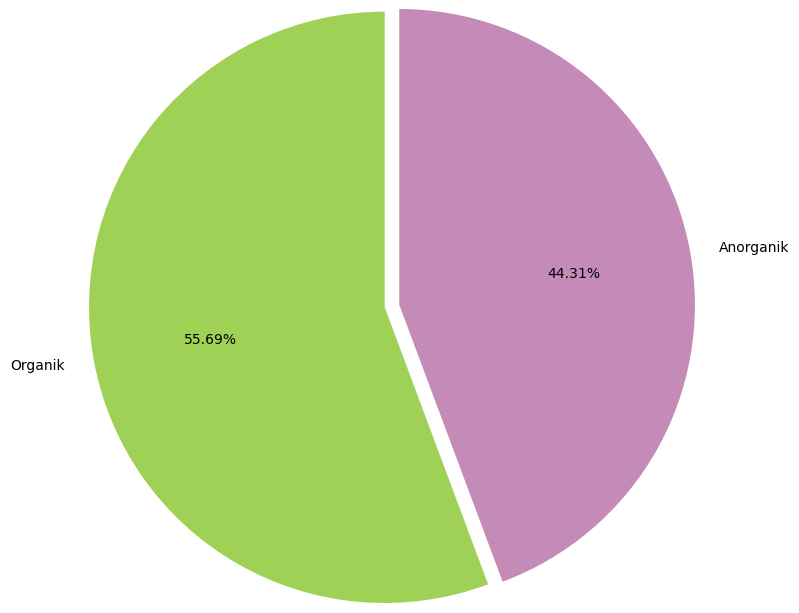

In [25]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organik', 'Anorganik'], colors= colors,radius=2)
plt.show()

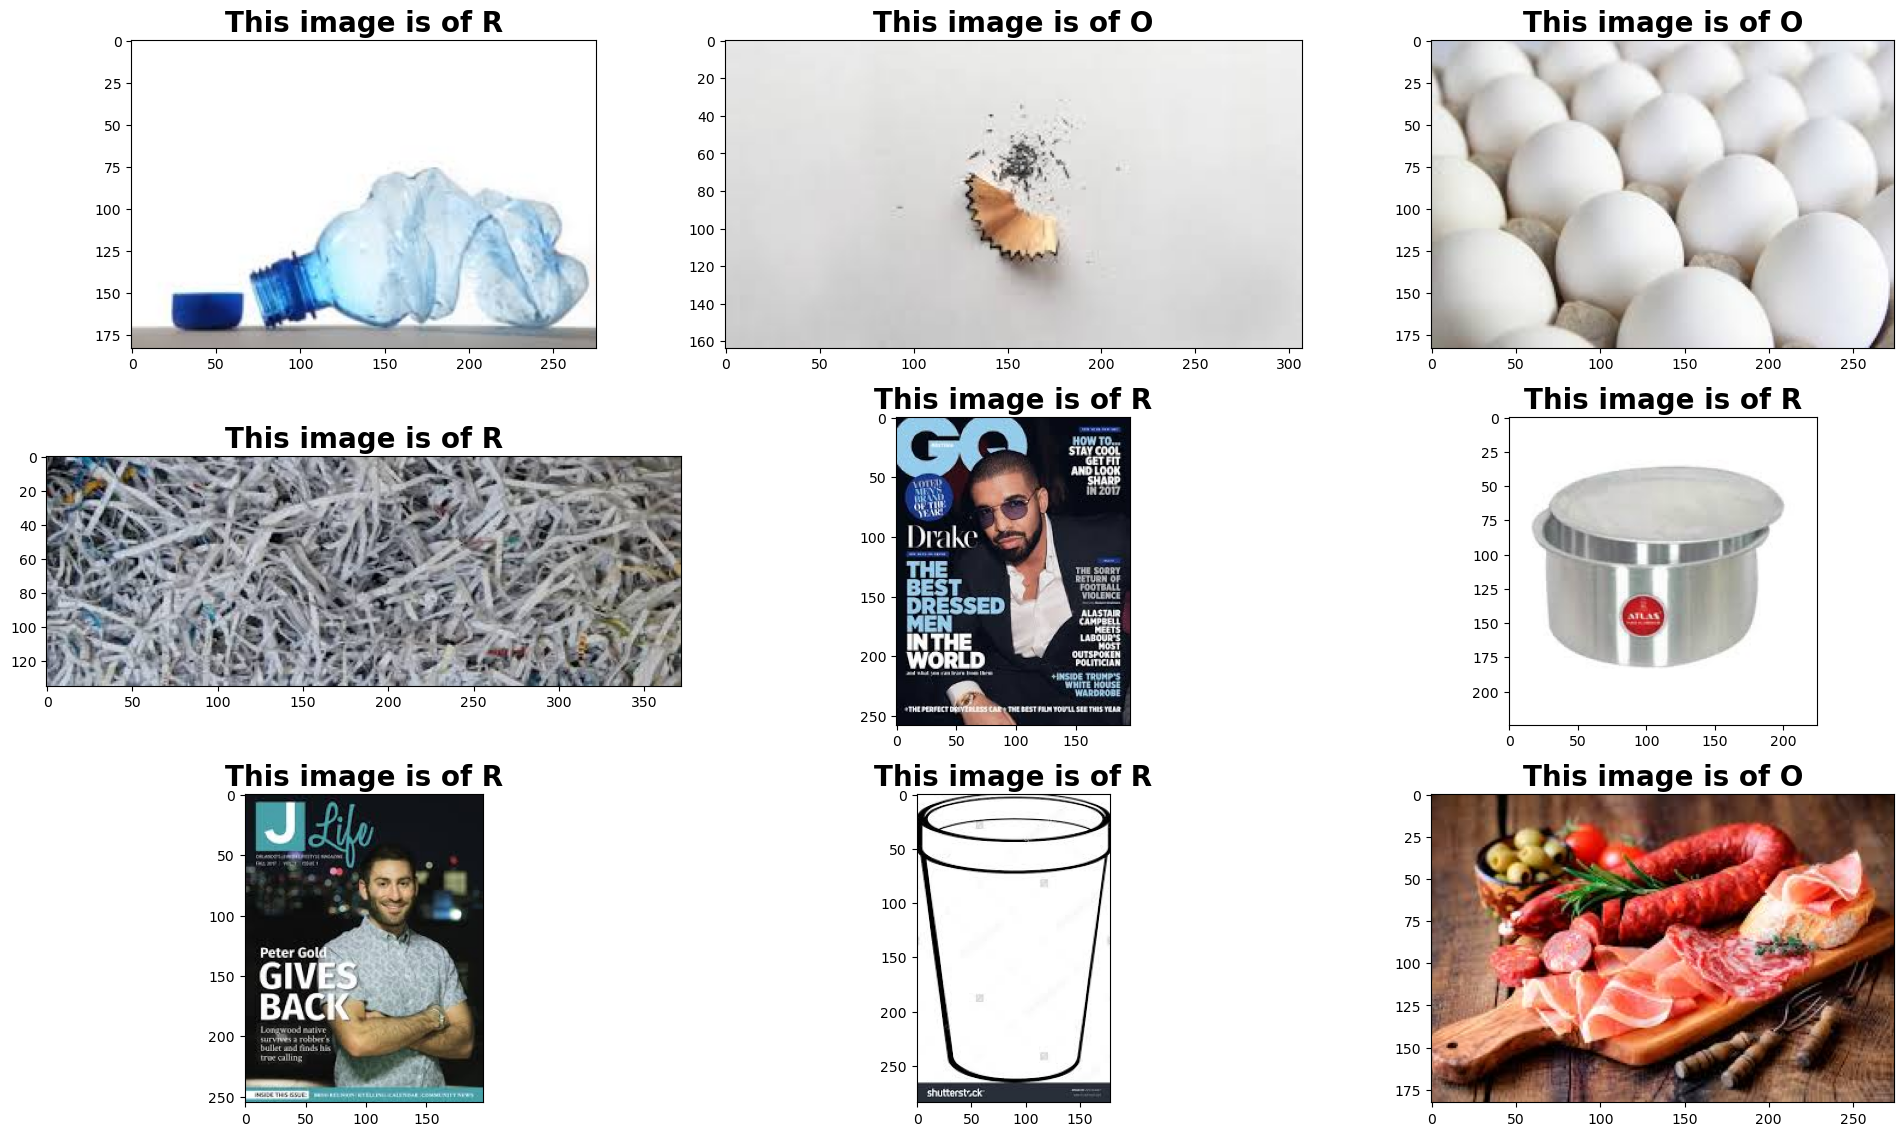

In [26]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [27]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [28]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

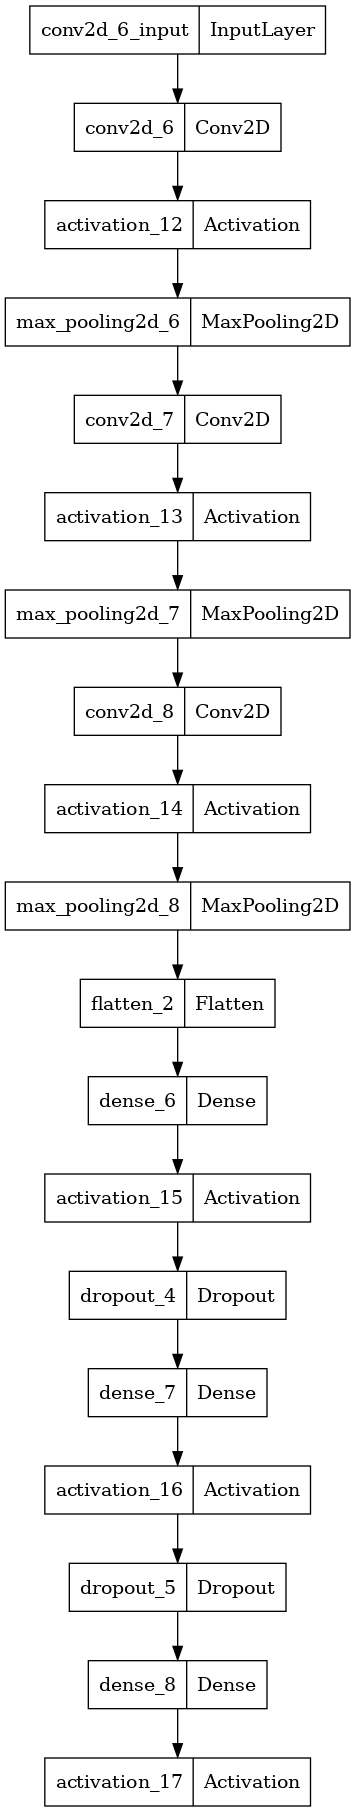

In [29]:
plot_model(model)

In [30]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [31]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [33]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=20,
        validation_data = test_generator)

Epoch 1/20
89/89 [==============================] - 1452s 16s/step - loss: 0.5372 - accuracy: 0.7704 - val_loss: 0.3595 - val_accuracy: 0.8587
Epoch 2/20
89/89 [==============================] - 1441s 16s/step - loss: 0.4219 - accuracy: 0.8278 - val_loss: 0.3168 - val_accuracy: 0.8838
Epoch 3/20
89/89 [==============================] - 1457s 16s/step - loss: 0.3771 - accuracy: 0.8467 - val_loss: 0.2826 - val_accuracy: 0.8922
Epoch 4/20
89/89 [==============================] - 1458s 16s/step - loss: 0.3496 - accuracy: 0.8598 - val_loss: 0.3006 - val_accuracy: 0.8922
Epoch 5/20
89/89 [==============================] - 1463s 16s/step - loss: 0.3275 - accuracy: 0.8686 - val_loss: 0.2828 - val_accuracy: 0.8870
Epoch 6/20
89/89 [==============================] - 1469s 16s/step - loss: 0.2926 - accuracy: 0.8826 - val_loss: 0.2707 - val_accuracy: 0.8953
Epoch 7/20
89/89 [==============================] - 1446s 16s/step - loss: 0.2615 - accuracy: 0.8978 - val_loss: 0.2735 - val_accuracy: 0.8973

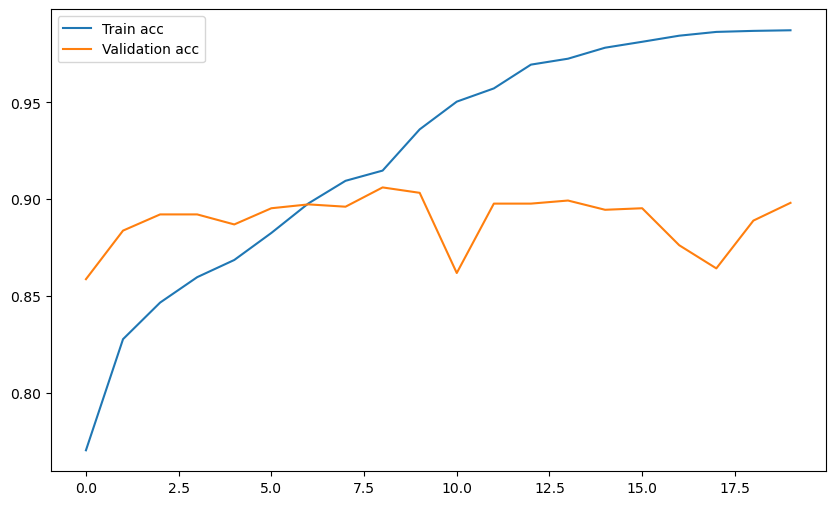

In [35]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

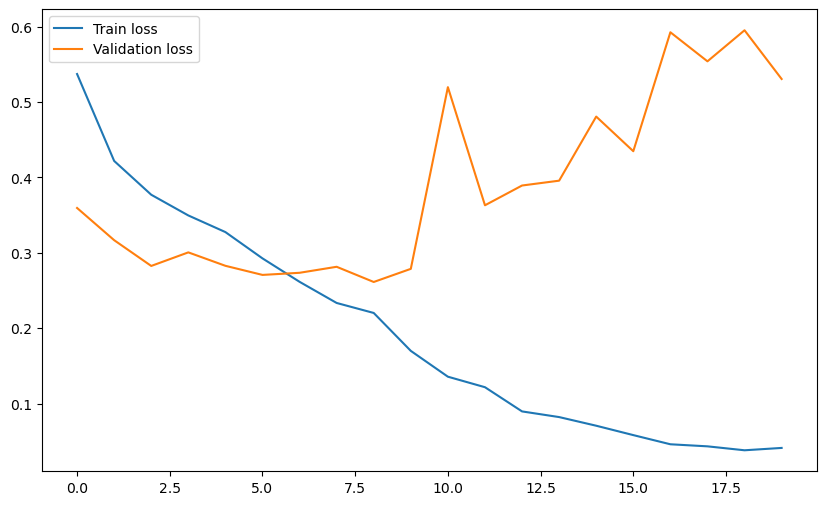

In [36]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

Model Prediction

In [38]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 278ms/step
This image -> Organic


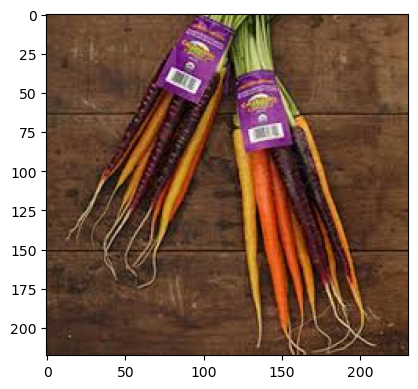

In [39]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)

1/1 [==============================] - 0s 69ms/step
This image -> Recyclable


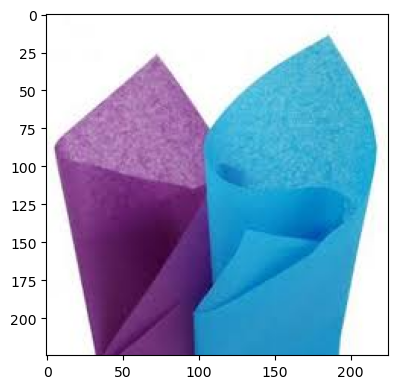

In [40]:
test_img = cv2.imread("/kaggle/input/waste-classification-data/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [41]:
model.evaluate(test_generator)

10/10 [==============================] - 48s 5s/step - loss: 0.5306 - accuracy: 0.8981


[0.530595064163208, 0.8981297016143799]

<Axes: >

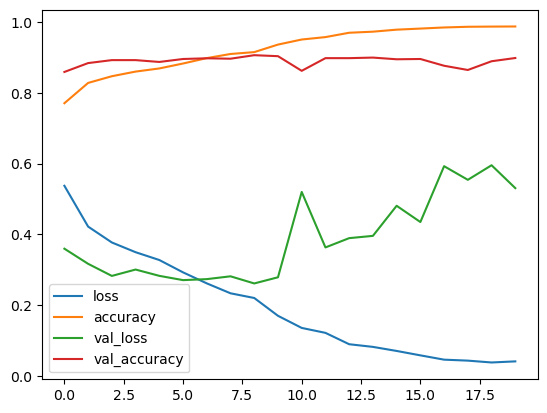

In [42]:
pd.DataFrame(hist.history).plot()

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_13 (Activation)  (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [52]:
model.save('model.h5')